# Baynes Sound
# May 30, 2017

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [13]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [14]:
Bathy, lon, lats = tidetools.get_bathy_data(grid)

In [15]:
geo_tools.find_closest_model_point( -124.74465,49.4616, lon, lats, land_mask = Bathy.mask)

(599, 125)

In [16]:
geo_tools.find_closest_model_point( -124.4440,49.2739, lon, lats, land_mask = Bathy.mask) #Deep Bay

(558, 155)

In [17]:
geo_tools.find_closest_model_point( -124.744444,49.460833, lon, lats, land_mask = Bathy.mask)

(599, 125)

# Hindcast

# June

In [6]:
ordered = ['/results/SalishSea/hindcast/01jun15/SalishSea_1h_20150601_20150601_grid_T.nc',
          '/results/SalishSea/hindcast/02jun15/SalishSea_1h_20150602_20150602_grid_T.nc',
          '/results/SalishSea/hindcast/03jun15/SalishSea_1h_20150603_20150603_grid_T.nc',
          '/results/SalishSea/hindcast/04jun15/SalishSea_1h_20150604_20150604_grid_T.nc',
          '/results/SalishSea/hindcast/05jun15/SalishSea_1h_20150605_20150605_grid_T.nc',
          '/results/SalishSea/hindcast/06jun15/SalishSea_1h_20150606_20150606_grid_T.nc',
          '/results/SalishSea/hindcast/07jun15/SalishSea_1h_20150607_20150607_grid_T.nc',
          '/results/SalishSea/hindcast/08jun15/SalishSea_1h_20150608_20150608_grid_T.nc',
          '/results/SalishSea/hindcast/09jun15/SalishSea_1h_20150609_20150609_grid_T.nc',
          '/results/SalishSea/hindcast/10jun15/SalishSea_1h_20150610_20150610_grid_T.nc',
          '/results/SalishSea/hindcast/11jun15/SalishSea_1h_20150611_20150611_grid_T.nc',
          '/results/SalishSea/hindcast/12jun15/SalishSea_1h_20150612_20150612_grid_T.nc',
          '/results/SalishSea/hindcast/13jun15/SalishSea_1h_20150613_20150613_grid_T.nc',
          '/results/SalishSea/hindcast/14jun15/SalishSea_1h_20150614_20150614_grid_T.nc',
          '/results/SalishSea/hindcast/15jun15/SalishSea_1h_20150615_20150615_grid_T.nc',
          '/results/SalishSea/hindcast/16jun15/SalishSea_1h_20150616_20150616_grid_T.nc',
          '/results/SalishSea/hindcast/17jun15/SalishSea_1h_20150617_20150617_grid_T.nc',
          '/results/SalishSea/hindcast/18jun15/SalishSea_1h_20150618_20150618_grid_T.nc',
          '/results/SalishSea/hindcast/19jun15/SalishSea_1h_20150619_20150619_grid_T.nc',
          '/results/SalishSea/hindcast/20jun15/SalishSea_1h_20150620_20150620_grid_T.nc',
          '/results/SalishSea/hindcast/21jun15/SalishSea_1h_20150621_20150621_grid_T.nc',
          '/results/SalishSea/hindcast/22jun15/SalishSea_1h_20150622_20150622_grid_T.nc',
          '/results/SalishSea/hindcast/23jun15/SalishSea_1h_20150623_20150623_grid_T.nc',
          '/results/SalishSea/hindcast/24jun15/SalishSea_1h_20150624_20150624_grid_T.nc',
          '/results/SalishSea/hindcast/25jun15/SalishSea_1h_20150625_20150625_grid_T.nc',
          '/results/SalishSea/hindcast/26jun15/SalishSea_1h_20150626_20150626_grid_T.nc',
          '/results/SalishSea/hindcast/27jun15/SalishSea_1h_20150627_20150627_grid_T.nc',
          '/results/SalishSea/hindcast/28jun15/SalishSea_1h_20150628_20150628_grid_T.nc',
          '/results/SalishSea/hindcast/29jun15/SalishSea_1h_20150629_20150629_grid_T.nc',
          '/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

with nc_tools.scDataset(ordered) as f:
    t = f.variables['votemper'][:,:,599,125]
    print(t.shape)

(720, 40)


In [53]:
with nc_tools.scDataset(ordered) as f:
    s = f.variables['vosaline'][:,:,599,125]
    print(s.shape)
    ss = f.variables['sossheig'][:,599,125]
    print(ss.shape)

(720, 40)
(720,)


In [2]:
ordered2 = ['/results/SalishSea/hindcast/28jun15/SalishSea_1h_20150628_20150628_grid_T.nc',
          '/results/SalishSea/hindcast/29jun15/SalishSea_1h_20150629_20150629_grid_T.nc',
          '/results/SalishSea/hindcast/30jun15/SalishSea_1h_20150630_20150630_grid_T.nc']

with nc_tools.scDataset(ordered2) as f:
    t2 = f.variables['votemper'][:,:,599,125]
    print(t2.shape)
    s2 = f.variables['vosaline'][:,:,599,125]
    print(s2.shape)
    ss2 = f.variables['sossheig'][:,599,125]
    print(ss2.shape)

(72, 40)
(72, 40)
(72,)


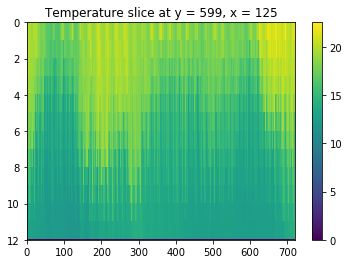

In [32]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Temperature slice at y = 599, x = 125')

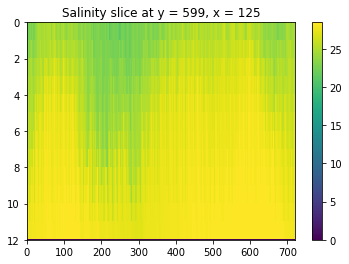

In [33]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Salinity slice at y = 599, x = 125')

# Three day T-S plots

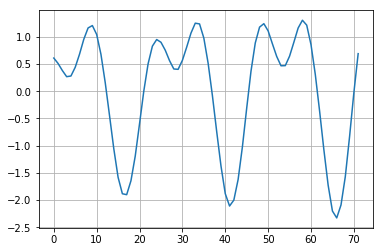

In [51]:
x = range(72)
plt.plot(x,ss2)
plt.grid('on')

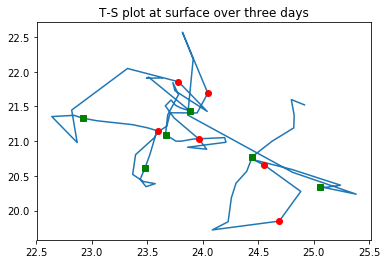

In [3]:
starttimes = np.arange(0,71,12)
endtimes = starttimes+12

k = 0
lows = []
highs = []
for n,m in zip(starttimes,endtimes):
    low = np.argmin(ss2[n:m])
    high = np.argmax(ss2[n:m])
    lows.append(low + 12*k)
    highs.append(high + 12*k)
    k = k+1

plt.plot(s2[:,0],t2[:,0]);
plt.title('T-S plot at surface over three days')
for m in highs:
    plt.plot(s2[m,0],t2[m,0],'ro')
for n in lows:
    plt.plot(s2[n,0],t2[n,0],'gs')

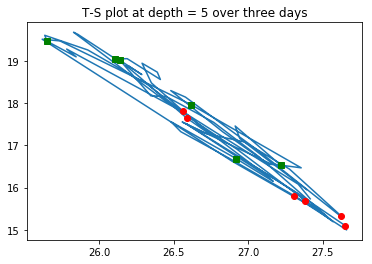

In [4]:
plt.plot(s2[:,5],t2[:,5]);
plt.title('T-S plot at depth = 5 over three days')
for m in highs:
    plt.plot(s2[m,5],t2[m,5],'ro')
for n in lows:
    plt.plot(s2[n,5],t2[n,5],'gs')

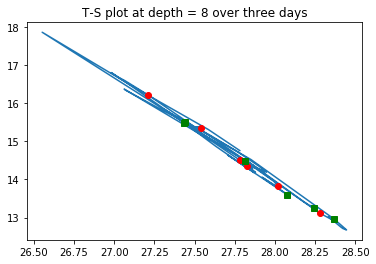

In [5]:
plt.plot(s2[:,8],t2[:,8]);
plt.title('T-S plot at depth = 8 over three days')
for m in highs:
    plt.plot(s2[m,8],t2[m,8],'ro')
for n in lows:
    plt.plot(s2[n,8],t2[n,8],'gs')

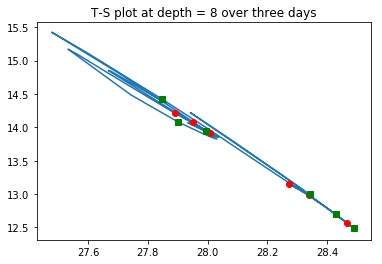

In [6]:
plt.plot(s2[:,10],t2[:,10]);
plt.title('T-S plot at depth = 8 over three days')
for m in highs:
    plt.plot(s2[m,10],t2[m,10],'ro')
for n in lows:
    plt.plot(s2[n,10],t2[n,10],'gs')

# T-S plots over June

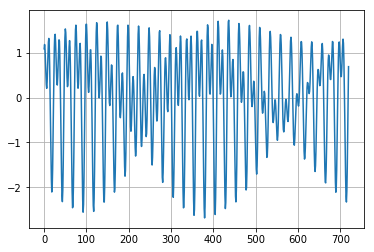

In [59]:
x = range(720)
plt.plot(x,ss)
plt.grid('on')

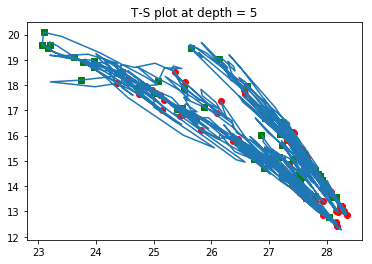

In [76]:
starttimes = np.arange(0,719,12)
endtimes = starttimes+12
k = 0
lows = []
highs = []
for n,m in zip(starttimes,endtimes):
    low = np.argmin(ss[n:m])
    high = np.argmax(ss[n:m])
    lows.append(low + 12*k)
    highs.append(high + 12*k)
    k = k+1
for m in highs:
    plt.plot(s[m,5],t[m,5],'ro')
for n in lows:
    plt.plot(s[n,5],t[n,5],'gs')
plt.plot(s[:,5],t[:,5]);
plt.title('T-S plot at depth = 5')

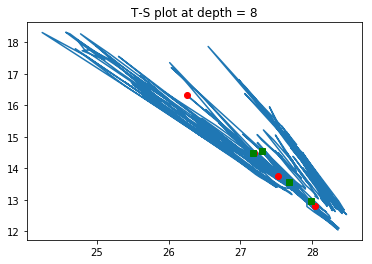

In [75]:
plt.plot(s[:,8],t[:,8]);
plt.title('T-S plot at depth = 8')
for m in highs:
    plt.plot(s[m,8],t[m,8],'ro')
for n in lows:
    plt.plot(s[n,8],t[n,8],'gs')

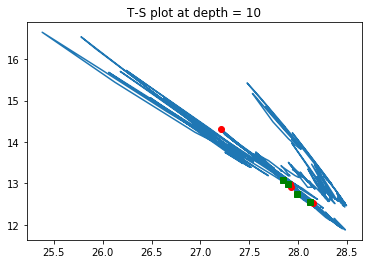

In [74]:
plt.plot(s[:,10],t[:,10]);
plt.title('T-S plot at depth = 10')
for m in highs:
    plt.plot(s[m,10],t[m,10],'ro')
for n in lows:
    plt.plot(s[n,10],t[n,10],'gs')

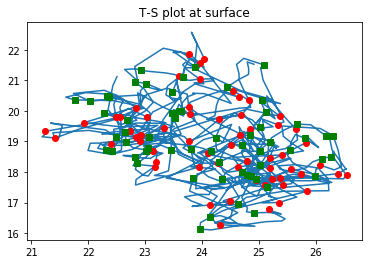

In [63]:
plt.plot(s[:,0],t[:,0]);
plt.title('T-S plot at surface')
for m in highs:
    plt.plot(s[m,0],t[m,0],'ro')
for n in lows:
    plt.plot(s[n,0],t[n,0],'gs')

# July

In [64]:
ordered3 = ['/results/SalishSea/hindcast/26jul15/SalishSea_1h_20150726_20150726_grid_T.nc',
          '/results/SalishSea/hindcast/27jul15/SalishSea_1h_20150727_20150727_grid_T.nc']

with nc_tools.scDataset(ordered3) as f:
    t3 = f.variables['votemper'][:,:,599,125]
    print(t3.shape)
    s3 = f.variables['vosaline'][:,:,599,125]
    print(s3.shape)
    ss3 = f.variables['sossheig'][:,599,125]
    print(ss3.shape)

(48, 40)
(48, 40)
(48,)


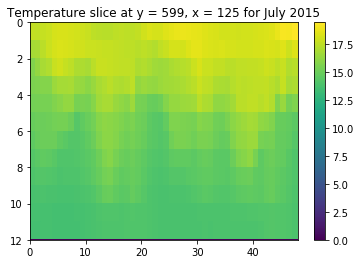

In [84]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t3.T)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Temperature slice at y = 599, x = 125 for July 2015')

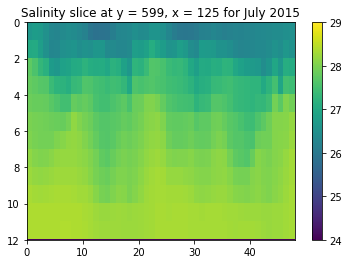

In [139]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s3.T,vmin = 24, vmax=29)
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Salinity slice at y = 599, x = 125 for July 2015')

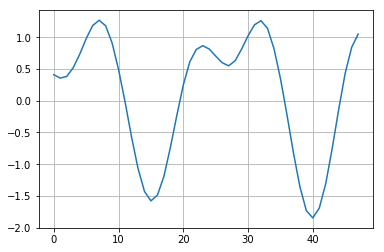

In [65]:
x = range(48)
plt.plot(x,ss3)
plt.grid('on')

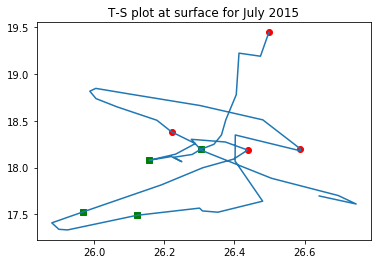

In [78]:
starttimes = np.arange(0,47,12)
endtimes = starttimes+12
k = 0
lows = []
highs = []
for n,m in zip(starttimes,endtimes):
    low = np.argmin(ss3[n:m])
    high = np.argmax(ss3[n:m])
    lows.append(low + 12*k)
    highs.append(high + 12*k)
    k = k+1
for m in highs:
    plt.plot(s3[m,0],t3[m,0],'ro')
for n in lows:
    plt.plot(s3[n,0],t3[n,0],'gs')
plt.plot(s3[:,0],t3[:,0]);
plt.title('T-S plot at surface for July 2015')

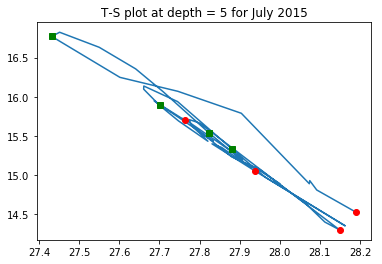

In [79]:
plt.plot(s3[:,5],t3[:,5]);
plt.title('T-S plot at depth = 5 for July 2015')
for m in highs:
    plt.plot(s3[m,5],t3[m,5],'ro')
for n in lows:
    plt.plot(s3[n,5],t3[n,5],'gs')

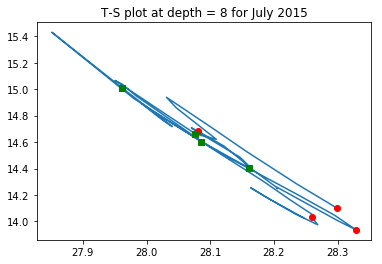

In [80]:
plt.plot(s3[:,8],t3[:,8]);
plt.title('T-S plot at depth = 8 for July 2015')
for m in highs:
    plt.plot(s3[m,8],t3[m,8],'ro')
for n in lows:
    plt.plot(s3[n,8],t3[n,8],'gs')

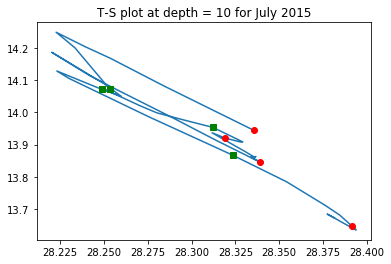

In [81]:
plt.plot(s3[:,10],t3[:,10]);
plt.title('T-S plot at depth = 10 for July 2015')
for m in highs:
    plt.plot(s3[m,10],t3[m,10],'ro')
for n in lows:
    plt.plot(s3[n,10],t3[n,10],'gs')

# B03

In [87]:
B03_big = nc.Dataset('/data/vdo/MEOPAR/completed-runs/B03/SalishSea_1h_20150626_20150706_grid_T.nc')

In [98]:
s4 = B03_big.variables['vosaline'][:,:,599,125]
t4 = B03_big.variables['votemper'][:,:,599,125]

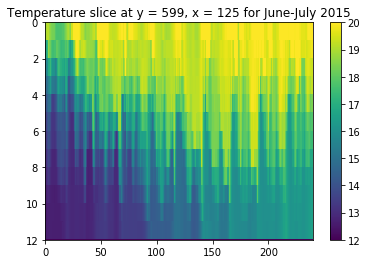

In [101]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(t4.T,vmin=12,vmax=20
                    )
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Temperature slice at y = 599, x = 125 for June-July 2015')

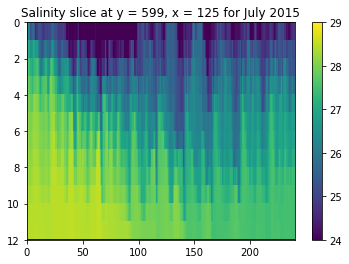

In [103]:
fig,ax = plt.subplots(1,1)
mesh = ax.pcolormesh(s4.T,vmin = 24, vmax=29
                    )
fig.colorbar(mesh)
ax.set_ylim((12,0))
plt.title('Salinity slice at y = 599, x = 125 for July 2015')

In [92]:
ss4 = B03_big.variables['sossheig'][:,599,125]

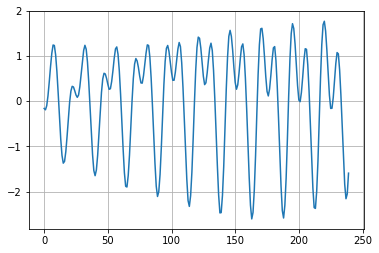

In [93]:
x = range(240)
plt.plot(x,ss4)
plt.grid('on')

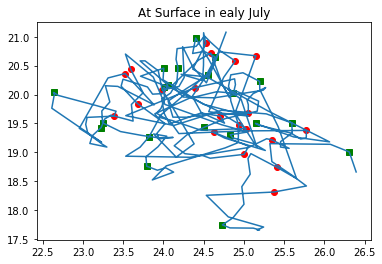

In [104]:
starttimes = np.arange(0,240,12)
endtimes = starttimes+12
k = 0
lows = []
highs = []
for n,m in zip(starttimes,endtimes):
    low = np.argmin(ss4[n:m])
    high = np.argmax(ss4[n:m])
    lows.append(low + 12*k)
    highs.append(high + 12*k)
    k = k+1
for m in highs:
    plt.plot(s4[m,0],t4[m,0],'ro')
for n in lows:
    plt.plot(s4[n,0],t4[n,0],'gs')
plt.plot(s4[:,0],t4[:,0])
plt.title('At Surface in ealy July')

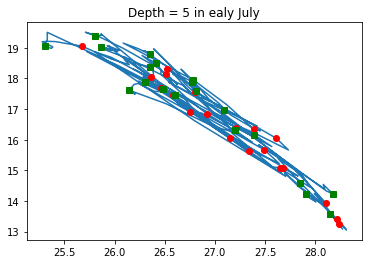

In [95]:
plt.plot(s4[:,5],t4[:,5])
plt.title('Depth = 5 in ealy July')
for m in highs:
    plt.plot(s4[m,5],t4[m,5],'ro')
for n in lows:
    plt.plot(s4[n,5],t4[n,5],'gs')

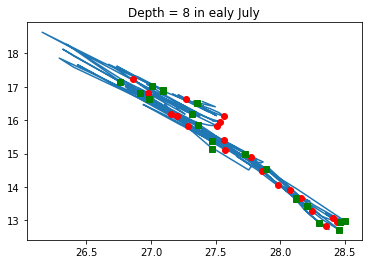

In [96]:
plt.plot(s4[:,8], t4[:,8])
plt.title('Depth = 8 in ealy July')
for m in highs:
    plt.plot(s4[m,8],t4[m,8],'ro')
for n in lows:
    plt.plot(s4[n,8],t4[n,8],'gs')

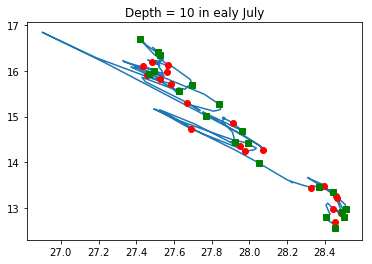

In [97]:
plt.plot(s4[:,10],t4[:,10])
plt.title('Depth = 10 in ealy July')
for m in highs:
    plt.plot(s4[m,10],t4[m,10],'ro')
for n in lows:
    plt.plot(s4[n,10],t4[n,10],'gs')

# Attempting to reproduce Salinity-Depth Plot

In [9]:
B02_bigx = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/B02/SalishSea_1h_20150308_20150318_grid_T.nc')

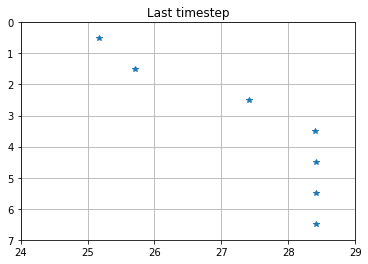

In [118]:
plt.plot(B02_big.variables['vosaline'][239,:,558,155], B02_bigx.deptht.values,'*')
plt.xlim(24,29)
plt.ylim(7,0)
plt.title('Last timestep')
plt.grid('on')

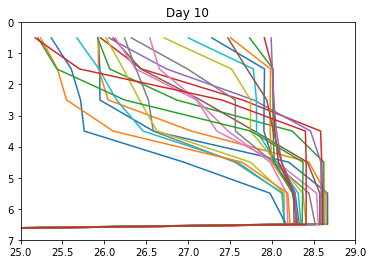

In [122]:
for n in range(216,240):
    plt.plot(B02_big.variables['vosaline'][n,:,558,155], B02_bigx.deptht.values)
plt.xlim(25,29)
plt.ylim(7,0)
plt.title('Day 10')
#plt.grid('on')

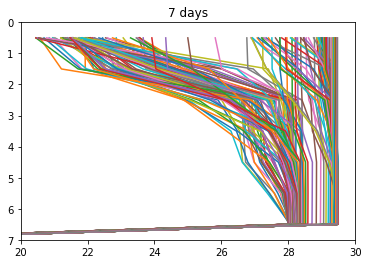

In [121]:
for n in range(168):
    plt.plot(B02_big.variables['vosaline'][n,:,558,155], B02_bigx.deptht.values)
plt.xlim(20,30)
plt.ylim(7,0)
plt.title('7 days')

In [6]:
for l in range(0,12):
    print(l//4, l%4)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
